Bibliografía: [GeeksForGeeks](https://www.geeksforgeeks.org/deep-learning/cifar-10-image-classification-in-tensorflow/).

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Parte 1

In [28]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Entrenamiento: ", x_train.shape, y_train.shape, "\nPrueba: ", x_test.shape, y_test.shape)

Entrenamiento:  (50000, 32, 32, 3) (50000, 1) 
Prueba:  (10000, 32, 32, 3) (10000, 1)


In [29]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

"""
Reducimos la cantidad de pixeles de las imágenes de 1-256 a 0-1.
Lo que permite al modelo seguir las tendencias y mejorar el entrenamiento.

Luego aplicamos la función `flatten()` para aplanar las etiquetas.
En otras palabras, convertimos las etiquetas de un formato de matriz 
2D a un formato de vector 1D.
"""

'\nReducimos la cantidad de pixeles de las imágenes de 1-256 a 0-1.\nLo que permite al modelo seguir las tendencias y mejorar el entrenamiento.\n\nLuego aplicamos la función `flatten()` para aplanar las etiquetas.\nEn otras palabras, convertimos las etiquetas de un formato de matriz \n2D a un formato de vector 1D.\n'

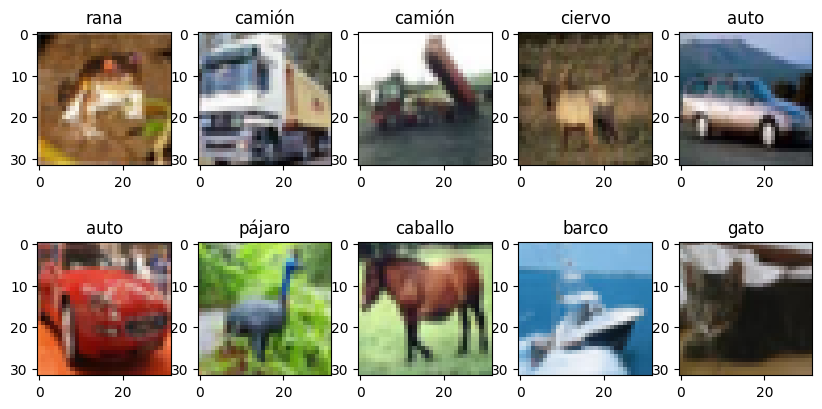

In [30]:
# Class names
class_names = ["avión", "auto", "pájaro", "gato", "ciervo",
               "perro", "rana", "caballo", "barco", "camión"]

# Show example images with classes
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
plt.show()


# Parte 2

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time

# ANN
model = Sequential([
    Flatten(input_shape=(32,32,3)),      # 32*32*3 -> 3072
    Dense(256, activation="relu"),       # Capa densa ReLU
    Dense(128, activation="relu"),       # Capa densa ReLU
    Dense(10, activation="softmax")      # Salida para 10 clases softmax
])

model.compile(optimizer=Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


c:\Users\15-4JO\Desktop\coding_Code\data-science\Lab4-DS-CNN\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Medir tiempo de entrenamiento
start_time = time.time()

historyann = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

end_time = time.time()
training_time = end_time - start_time
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3275 - loss: 1.8732 - val_accuracy: 0.3708 - val_loss: 1.7499
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3963 - loss: 1.6841 - val_accuracy: 0.4146 - val_loss: 1.6323
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4254 - loss: 1.6039 - val_accuracy: 0.4362 - val_loss: 1.5803
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4463 - loss: 1.5456 - val_accuracy: 0.4415 - val_loss: 1.5840
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.4636 - loss: 1.5054 - val_accuracy: 0.4536 - val_loss: 1.5284
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.4759 - loss: 1.4726 - val_accuracy: 0.4639 - val_loss: 1.4951
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4822 - loss: 1.4492 - val_accuracy: 0.4699 - val_loss: 1.4754
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.4873 - loss: 1.4302 - 

El modelo utilizado fue una Red Neuronal Totalmente Conectada de 2 capas densas con la función de activación ReLU y una capa de salida de 10 clases con la función softmax. El modelo realizó una predicción de 10 épocas de ~5s cada una, para un total de 56s de entrenamiento.

Las épocas del modelo presentan una mejora en la exactitud del entrenamiento pasando de 0.33 en la primera a 0.50 en la última y un decrecimiento en la pérdida del entrenamiento pasando de 1.86 a 1.39.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definir el modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # ojo aquí
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

# Se agregaron las dos capas con filtros de capas de 32 con la activación RELU
    
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')

    # Por otro lado tambion se añadio softmax y y dense para entrenar la red.
])


# Compilación
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Este modelo define una CNN en Keras que inicia con dos capas convolucionales (32 y 64 filtros, activación ReLU) y operaciones de MaxPooling para extraer y reducir características. Luego, los mapas se aplanan y pasan a una capa densa de 128 neuronas con Dropout para evitar sobreajuste. La salida se compone de 10 neuronas con Softmax, que asignan probabilidades a cada clase. El modelo se compila con Adam y la pérdida sparse_categorical_crossentropy, quedando listo para entrenarse.

In [43]:
from tensorflow.keras.callbacks import EarlyStopping


# Definir callback EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
# Entrenar
historycnn =  model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1,
    callbacks=[early_stop]
)

# Evaluación
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

end_time = time.time()
training_time = end_time - start_time
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos") 


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.3968 - loss: 1.6624 - val_accuracy: 0.5365 - val_loss: 1.3042
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5239 - loss: 1.3317 - val_accuracy: 0.6044 - val_loss: 1.1588
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5783 - loss: 1.1962 - val_accuracy: 0.6295 - val_loss: 1.0655
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6094 - loss: 1.1110 - val_accuracy: 0.6609 - val_loss: 0.9793
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6349 - loss: 1.0409 - val_accuracy: 0.6617 - val_loss: 0.9613
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6512 - loss: 0.9909 - val_accuracy: 0.6789 - val_loss: 0.9245
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6675 - loss: 0.9468 - val_accuracy: 0.6856 - val_loss: 0.9192
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6822 - loss: 0.9081 - 

Se puede observar de acuerdo con los dos modelos, ANN y CNN una clara distinción en estos modelos con las cuales se puede identificar como la precisión del modelo al igual que el tiempo de ejecución con los mismos hiperparametros.  

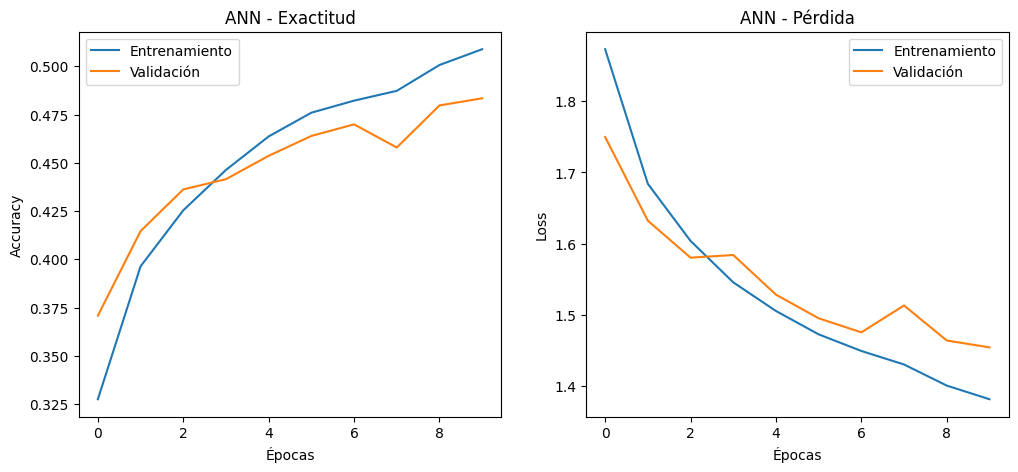

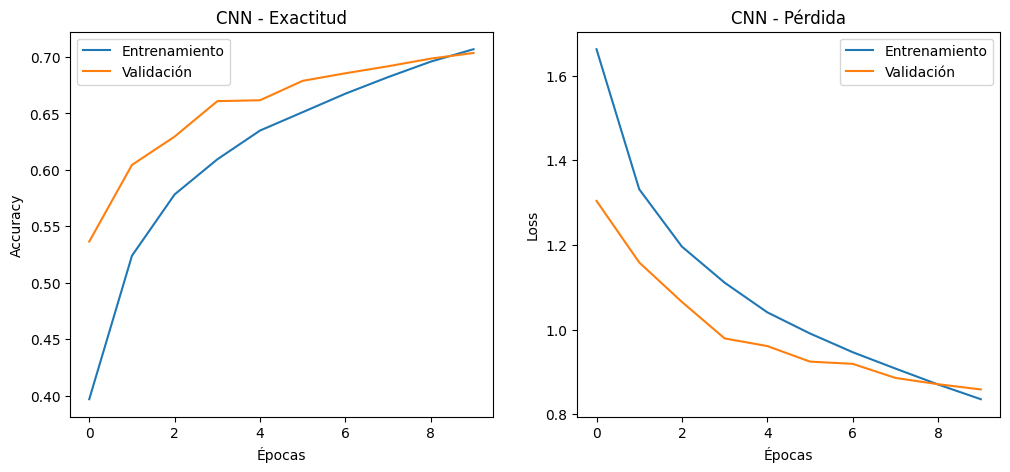

In [44]:
import matplotlib.pyplot as plt

def plot_history(history, title="Modelo"):
    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'{title} - Exactitud')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title(f'{title} - Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Graficar ambas redes
plot_history(historyann, "ANN")
plot_history(historycnn, "CNN")


En el caso de la ANN, las gráficas muestran un incremento progresivo en la exactitud, pasando de aproximadamente 0.32 en las primeras épocas a cerca de 0.50 en entrenamiento y 0.48 en validación. La pérdida disminuye de manera constante, lo que indica que el modelo está aprendiendo. Sin embargo, la precisión alcanzada es limitada y revela que la red neuronal totalmente conectada no logra representar adecuadamente las características complejas de las imágenes del conjunto CIFAR-10.

Por otro lado, la CNN presenta un desempeño significativamente mejor. Su exactitud aumenta rápidamente desde 0.40 hasta alrededor de 0.70 tanto en entrenamiento como en validación, con curvas que se mantienen cercanas entre sí. La pérdida también muestra una reducción marcada, pasando de 1.65 a 0.8, lo que confirma que la CNN logra una optimización más efectiva y consistente.

En la comparación directa, se observa claramente que la CNN supera ampliamente a la ANN. Mientras que la red totalmente conectada apenas alcanza la mitad de precisión, la CNN logra un rendimiento mucho más alto y con mejor capacidad de generalización. Esto demuestra que para un problema de visión por computadora como CIFAR-10, las convoluciones son esenciales para extraer patrones espaciales y obtener resultados satisfactorios.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


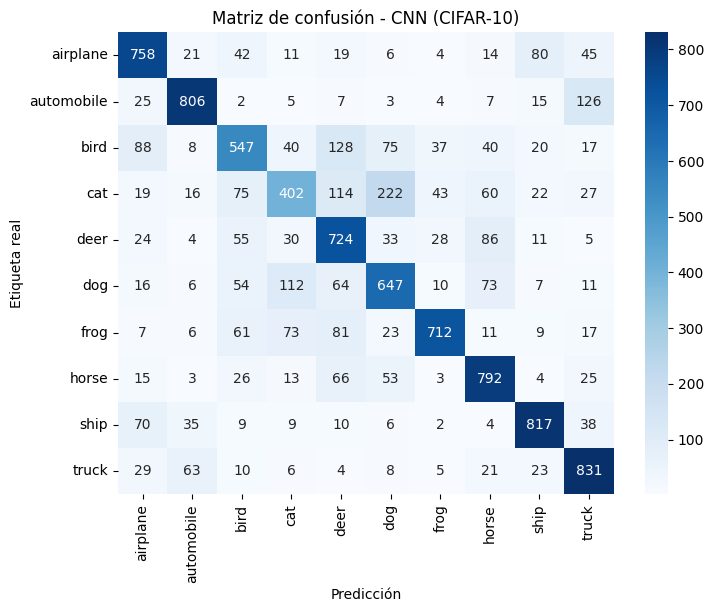

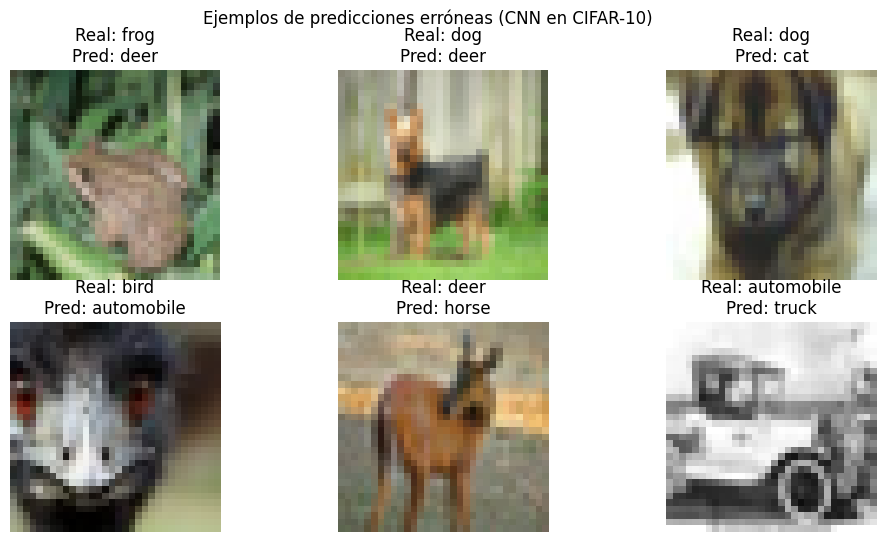

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.reshape(-1)   # CIFAR-10 labels are sometimes shape (N,1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de confusión - CNN (CIFAR-10)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()

# Mostrar algunos errores
errors = np.where(y_pred != y_true)[0]

plt.figure(figsize=(12,6))
for i, idx in enumerate(errors[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[idx])  
    plt.title(f"Real: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis("off")
plt.suptitle("Ejemplos de predicciones erróneas (CNN en CIFAR-10)")
plt.show()


En este problema se observa que la red convolucional (CNN) supera ampliamente a la red neuronal artificial (ANN). La diferencia principal radica en la manera en que ambas arquitecturas procesan la información visual. Mientras que la ANN considera cada píxel como una característica independiente, sin aprovechar la relación espacial entre ellos, la CNN utiliza filtros convolucionales que permiten extraer patrones locales como bordes, texturas y formas, construyendo representaciones jerárquicas más ricas. Esto hace que la CNN sea mucho más eficiente en problemas de visión por computadora como CIFAR-10, donde la complejidad de las imágenes requiere detectar estructuras espaciales.

Las capas de convolución desempeñan un papel esencial al actuar como detectores de características, que se van haciendo más abstractas a medida que avanzan las capas. Por ejemplo, en las primeras capas se detectan líneas y bordes, mientras que en capas más profundas aparecen formas más complejas como siluetas de objetos. Por su parte, las capas de pooling ayudan a reducir la dimensionalidad de los mapas de características, manteniendo la información relevante y descartando ruido. Esto no solo disminuye el costo computacional, sino que también aporta cierta invariancia a traslaciones y deformaciones en las imágenes, lo cual mejora la capacidad de generalización del modelo.

En cuanto a posibles mejoras, se pueden aplicar diversas técnicas para optimizar el rendimiento. El data augmentation es una de las más importantes, ya que permite generar versiones transformadas de las imágenes (rotaciones, espejado, recortes, cambios de iluminación), ampliando así el conjunto de entrenamiento y reduciendo el sobreajuste. También es recomendable implementar arquitecturas más profundas como VGG, ResNet o Inception, que han demostrado un rendimiento sobresaliente en problemas de clasificación de imágenes más complejas. Finalmente, el uso de Batch Normalization puede estabilizar y acelerar el entrenamiento, además de mejorar la capacidad de generalización al normalizar las activaciones en cada capa.

En conclusión, la superioridad de la CNN frente a la ANN en este contexto se debe a su capacidad para aprovechar la estructura espacial de las imágenes, extrayendo características relevantes de manera jerárquica y eficiente. Sin embargo, aún es posible mejorar los resultados aplicando técnicas de regularización y arquitecturas más avanzadas que permitan enfrentar con mayor solidez los desafíos que presenta el dataset CIFAR-10.